In [2]:
# import beautifulsoup and request  

from bs4 import BeautifulSoup as bs

import requests
import pandas as pd

### load the webpage


In [4]:
# getting the html file
r = requests.get('https://en.wikipedia.org/wiki/The_Absent-Minded_Professor')

# convert to beautiful soup
soup = bs(r.content)

# getting the area of interst as a list of string
table = soup.find(class_="infobox vevent") 

# then we get the table rows
t_rows = table.find_all("tr")


for i in t_rows:
    print(i.prettify())

    


<tr>
 <th class="infobox-above summary" colspan="2" style="font-size:110%;font-style:italic;">
  The Absent-Minded Professor
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:The_Absent-Minded_Professor_-_1963_-_Poster.png">
   <img alt="The Absent-Minded Professor - 1963 - Poster.png" class="thumbborder" data-file-height="390" data-file-width="254" decoding="async" height="338" src="//upload.wikimedia.org/wikipedia/en/thumb/f/fd/The_Absent-Minded_Professor_-_1963_-_Poster.png/220px-The_Absent-Minded_Professor_-_1963_-_Poster.png" srcset="//upload.wikimedia.org/wikipedia/en/f/fd/The_Absent-Minded_Professor_-_1963_-_Poster.png 1.5x" width="220"/>
  </a>
  <div class="infobox-caption" style="font-size:95%;padding:0.35em 0.35em 0.25em;line-height:1.25em;">
   Theatrical release poster
  </div>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space:nowrap;padding-right:0.65em;">
  Directed by
 </th>
 <td class="infobox-data

### our area of interest is going to be the info box on the right as shown below

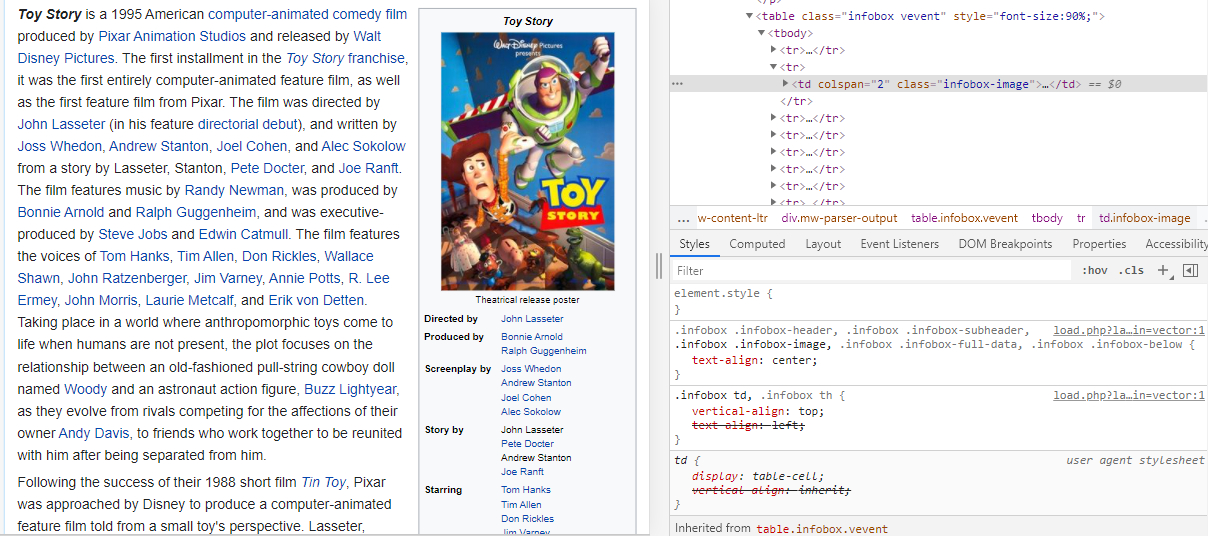

### make a dictionary for the table data

In [53]:
# concatenating what we want 
data_dict = {}

data_dict['title']= table.find("th").get_text()

def remove_tags(soup):
    ''' takes a soup object and remove the tags '''
    for tag in soup.find_all('sup'):
        tag.decompose() 
    for tag in soup.find_all('span'):
        tag.decompose()
    return soup ;

# there is some data that contains more than one element and it is noted with the tag 'li'
def get_data_list (row) :
    
    ''' this function takes a row tag (tr) and looks for a list tag (li) and if found returns a list of this data '''
    
    if row.find('li') :
        return [li.get_text(strip=True).replace('\xa0',' ') for li in row.find_all('li')] 
    elif row.find('br') :
        return [text for text in row.stripped_strings]
    else :
        return row.find('td').get_text(strip=True).replace('\n',' / ').replace('\xa0',' ') #.strip('[1]').strip('[2]').strip('[3]')


remove_tags(table)  # removing it from the whole table 
def get_dict(table_rows) :  
    for index , i in enumerate(table_rows) :
        if index != 0 and index != 1 :  # to ignore the title and the content data
            data_dict[i.find('th').get_text(" ",strip=True)]= get_data_list(i)  
    return data_dict ;

get_dict(t_rows)

{'title': 'The Absent-Minded Professor',
 'Directed by': 'Robert Stevenson',
 'Produced by': ['Walt Disney', 'Bill Walsh'],
 'Written by': 'Bill Walsh',
 'Based on': ['Based on',
  '"A Situation of Gravity"',
  '1922 short story',
  'by',
  'Samuel W. Taylor'],
 'Starring': ['Fred MacMurray',
  'Nancy Olson',
  'Keenan Wynn',
  'Tommy Kirk',
  'Leon Ames',
  'Elliott Reid',
  'Edward Andrews'],
 'Music by': 'George Bruns',
 'Cinematography': 'Edward Colman',
 'Edited by': 'Cotton Warburton',
 'Production company': ['Production', 'company', 'Walt Disney Productions'],
 'Distributed by': 'Buena Vista Distribution',
 'Release date': 'March 16, 1961',
 'Running time': '97 minutes',
 'Country': 'United States',
 'Language': 'English',
 'Box office': '$25.4 million'}

In [54]:
# going to the wiki that has all movies 
# getting the html file
r = requests.get('https://en.m.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films')

# convert to beautiful soup
soup_all = bs(r.content)

# getting the area of interst as a list of string , we want the href to go to the movie page and we want also the title 
# i noticed that the tables has this class " wikitable sortable " and the hyperlinks is all in <I> tags 
# in the select statement use dot before the name of the class and instead of the spaces

tables_links = soup_all.select('.wikitable.sortable i a') 

''' there was italics other than movies but they don't have <a> tag so when getting into it those will disappear 
, also movies without links when getting into the a class you will remove them

'''

''' tables_links[1].find('a').attrs['href'] or table_links.a['href'] if a is achild '''

tables_links



#content-collapsible-block-0 > table:nth-child(8) > tbody > tr:nth-child(3) > td:nth-child(2) > i > a

[<a href="/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons" title="Academy Award Review of Walt Disney Cartoons">Academy Award Review of Walt Disney Cartoons</a>,
 <a href="/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)" title="Snow White and the Seven Dwarfs (1937 film)">Snow White and the Seven Dwarfs</a>,
 <a href="/wiki/Pinocchio_(1940_film)" title="Pinocchio (1940 film)">Pinocchio</a>,
 <a href="/wiki/Fantasia_(1940_film)" title="Fantasia (1940 film)">Fantasia</a>,
 <a href="/wiki/The_Reluctant_Dragon_(1941_film)" title="The Reluctant Dragon (1941 film)">The Reluctant Dragon</a>,
 <a href="/wiki/Dumbo" title="Dumbo">Dumbo</a>,
 <a href="/wiki/Bambi" title="Bambi">Bambi</a>,
 <a href="/wiki/Saludos_Amigos" title="Saludos Amigos">Saludos Amigos</a>,
 <a href="/wiki/Victory_Through_Air_Power_(film)" title="Victory Through Air Power (film)">Victory Through Air Power</a>,
 <a href="/wiki/The_Three_Caballeros" title="The Three Caballeros">The Three Caballeros</a>,
 <a href="/wiki/M

### okay the process of getting all other urls and all other dictionaries will be as follows :
1. we wil extract each url from the "table_links" to direct us to each movie page 
2. we will define a fn that takes the url and does exactly like we did in the first movie page  


In [55]:
# extracting the urls  
''' to elemenate this error 'TypeError: 'NoneType' object is not subscriptable' >> go try , except to know what is causing the error ''' 
links = []
titles = []
base_path = 'https://en.m.wikipedia.org/'
for i , movie in enumerate(tables_links):
    try :
        full_path = base_path + movie['href']
        links.append(full_path)
        titles.append(movie['title'])  
    except Exception as e:
        print(movie.get_text())
        print(e)
links


['https://en.m.wikipedia.org//wiki/Academy_Award_Review_of_Walt_Disney_Cartoons',
 'https://en.m.wikipedia.org//wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)',
 'https://en.m.wikipedia.org//wiki/Pinocchio_(1940_film)',
 'https://en.m.wikipedia.org//wiki/Fantasia_(1940_film)',
 'https://en.m.wikipedia.org//wiki/The_Reluctant_Dragon_(1941_film)',
 'https://en.m.wikipedia.org//wiki/Dumbo',
 'https://en.m.wikipedia.org//wiki/Bambi',
 'https://en.m.wikipedia.org//wiki/Saludos_Amigos',
 'https://en.m.wikipedia.org//wiki/Victory_Through_Air_Power_(film)',
 'https://en.m.wikipedia.org//wiki/The_Three_Caballeros',
 'https://en.m.wikipedia.org//wiki/Make_Mine_Music',
 'https://en.m.wikipedia.org//wiki/Song_of_the_South',
 'https://en.m.wikipedia.org//wiki/Fun_and_Fancy_Free',
 'https://en.m.wikipedia.org//wiki/Melody_Time',
 'https://en.m.wikipedia.org//wiki/So_Dear_to_My_Heart',
 'https://en.m.wikipedia.org//wiki/The_Adventures_of_Ichabod_and_Mr._Toad',
 'https://en.m.wikipedia.org//wiki/Cin

In [56]:
def get_movie_dict(url):

    r = requests.get(url)
    soup = bs(r.content)
    table = soup.find(class_="infobox vevent") 
    remove_tags(table)
    t_rows = table.find_all("tr")
    # concatenating what we want 
    data_dict = {}
    data_dict['title']= table.find("th").get_text()
    for index , i in enumerate(t_rows) :
        if index != 0 and index != 1 :  # to ignore the title and the content data
            data_dict[i.find('th').get_text(" ",strip=True)]= get_data_list(i)  
    return data_dict

In [57]:
movies = []
for index,i in enumerate(links) :
   ## if index == 5 :
     ##   break
    try :
        movies.append(get_movie_dict(i))
    except :
        print(i)
len(movies)

https://en.m.wikipedia.org//wiki/Zorro_(1957_TV_series)#Theatrical
https://en.m.wikipedia.org//wiki/Zorro_(1957_TV_series)#Theatrical
https://en.m.wikipedia.org//wiki/One_Little_Indian_(film)
https://en.m.wikipedia.org//wiki/True-Life_Adventures
https://en.m.wikipedia.org//wiki/Spirited_Away
https://en.m.wikipedia.org//wiki/Howl%27s_Moving_Castle_(film)
https://en.m.wikipedia.org//wiki/The_Nightmare_Before_Christmas
https://en.m.wikipedia.org//wiki/The_Secret_of_the_Magic_Gourd_(2007_film)
https://en.m.wikipedia.org//wiki/Ponyo
https://en.m.wikipedia.org//wiki/Tales_from_Earthsea_(film)
https://en.m.wikipedia.org//wiki/Arrietty
https://en.m.wikipedia.org//wiki/Khoobsurat_(2014_film)
https://en.m.wikipedia.org//wiki/Tini:_The_Movie
https://en.m.wikipedia.org//wiki/Born_in_China


436

In [58]:
movies

[{'title': 'Academy Award Review of ',
  'Production company': ['Production', 'company', 'Walt Disney Productions'],
  'Release date': ['May 19, 1937'],
  'Running time': '41 minutes (74 minutes 1966 release)',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$45.472'},
 {'title': 'Snow White and the Seven Dwarfs',
  'Directed by': ['David Hand(supervising)',
   'William Cottrell',
   'Wilfred Jackson',
   'Larry Morey',
   'Perce Pearce',
   'Ben Sharpsteen'],
  'Produced by': 'Walt Disney',
  'Written by': ['Ted Sears',
   'Richard Creedon',
   'Otto Englander',
   'Dick Rickard',
   'Earl Hurd',
   'Merrill De Maris',
   'Dorothy Ann Blank',
   'Webb Smith'],
  'Based on': ['Based on', 'Snow White', 'by The', 'Brothers Grimm'],
  'Starring': ['Adriana Caselotti',
   'Lucille La Verne',
   'Harry Stockwell',
   'Roy Atwell',
   'Pinto Colvig',
   'Otis Harlan',
   'Scotty Mattraw',
   'Billy Gilbert',
   'Eddie Collins',
   'Moroni Olsen',
   'Stuart Buchanan']

#### we can further investigate those links to see their issues but leaving it for now

In [22]:
disney = pd.read_csv('disney_c.csv')
disney.head()

,title,Production company,Release date,Running time,Country,Language,Box office,Directed by,Produced by,Written by,...,Distributed by,Budget,Story by,Narrated by,Cinematography,Edited by,Languages,Screenplay by,Countries,Production companies
0,Academy Award Review of,"['Production', 'company', 'Walt Disney Product...","['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,$45.472,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,"['Production', 'company', 'Walt Disney Product...","['December 21, 1937(Carthay Circle Theatre,Los...",83 minutes,United States,English,$418 million,"['David Hand(supervising)', 'William Cottrell'...",Walt Disney,"['Ted Sears', 'Richard Creedon', 'Otto England...",...,RKO Radio Pictures,$1.49 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pinocchio,"['Production', 'company', 'Walt Disney Product...","['February 7, 1940(Center Theatre)', 'February...",88 minutes,United States,English,$164 million,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,NaN,...,RKO Radio Pictures,$2.6 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fantasia,"['Production', 'company', 'Walt Disney Product...","['November 13, 1940']",126 minutes,United States,English,$76.4–$83.3 million,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,...,RKO Radio Pictures,$2.28 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN
4,The Reluctant Dragon,"['Production', 'company', 'Walt Disney Product...","['June 27, 1941']",74 minutes,United States,English,"$960,000 (worldwide rentals)","['Directed by', 'Alfred Werker', '(live action...",Walt Disney,"['Written by', 'Live-action:', 'Ted Sears', 'A...",...,RKO Radio Pictures,"$600,000",NaN,NaN,Bert Glennon,Paul Weatherwax,NaN,NaN,NaN,NaN


### let's do some cleaning

1. extracting the number from 'running time' column

In [23]:
# cleaning running time and extracting only integer values 
import numpy as np
disney['Running time']=disney['Running time'].astype('str')

def get_int(string_arr):
      if string_arr.split(',')[0] == "['Running time'":
        return string_arr.split(',')[1].split(' ')[0]
      else:  
        for i in string_arr.split('min') :
            try :

                int(i)
                if i == ' ':
                    return None
                else:
                    return i.strip(' ') ;
            except :
                if string_arr.split('Min'):
                    return string_arr.split('Min')[0]
                else:
                    
                    print(string_arr,type(string_arr))
                    return None ;
        
   # if string.split(' ')[0].isnumeric():
    #    return string.split(' ')[0]
    #elif string.split(' ')[1].isnumeric()
        


disney['Running time (int)']=disney['Running time'].apply(lambda x: get_int(x) )

disney.head()


,title,Production company,Release date,Running time,Country,Language,Box office,Directed by,Produced by,Written by,...,Budget,Story by,Narrated by,Cinematography,Edited by,Languages,Screenplay by,Countries,Production companies,Running time (int)
0,Academy Award Review of,"['Production', 'company', 'Walt Disney Product...","['May 19, 1937']",41 minutes (74 minutes 1966 release),United States,English,$45.472,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
1,Snow White and the Seven Dwarfs,"['Production', 'company', 'Walt Disney Product...","['December 21, 1937(Carthay Circle Theatre,Los...",83 minutes,United States,English,$418 million,"['David Hand(supervising)', 'William Cottrell'...",Walt Disney,"['Ted Sears', 'Richard Creedon', 'Otto England...",...,$1.49 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83
2,Pinocchio,"['Production', 'company', 'Walt Disney Product...","['February 7, 1940(Center Theatre)', 'February...",88 minutes,United States,English,$164 million,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,NaN,...,$2.6 million,"['Ted Sears', 'Otto Englander', 'Webb Smith', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,88
3,Fantasia,"['Production', 'company', 'Walt Disney Product...","['November 13, 1940']",126 minutes,United States,English,$76.4–$83.3 million,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,...,$2.28 million,"['Joe Grant', 'Dick Huemer']",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,126
4,The Reluctant Dragon,"['Production', 'company', 'Walt Disney Product...","['June 27, 1941']",74 minutes,United States,English,"$960,000 (worldwide rentals)","['Directed by', 'Alfred Werker', '(live action...",Walt Disney,"['Written by', 'Live-action:', 'Ted Sears', 'A...",...,"$600,000",NaN,NaN,Bert Glennon,Paul Weatherwax,NaN,NaN,NaN,NaN,74


2. the 'Release date' is missy so i will try to extract the date from it 


### lets make a checkpoint 

In [24]:
disney_data = disney

- choosing columns of interest 

In [25]:

disney_data = disney_data[["title","Release date","Running time (int)","Country","Box office","Directed by","Produced by","Written by","Budget"]]
disney_data

,title,Release date,Running time (int),Country,Box office,Directed by,Produced by,Written by,Budget
0,Academy Award Review of,"['May 19, 1937']",41,United States,$45.472,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,"['December 21, 1937(Carthay Circle Theatre,Los...",83,United States,$418 million,"['David Hand(supervising)', 'William Cottrell'...",Walt Disney,"['Ted Sears', 'Richard Creedon', 'Otto England...",$1.49 million
2,Pinocchio,"['February 7, 1940(Center Theatre)', 'February...",88,United States,$164 million,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,NaN,$2.6 million
3,Fantasia,"['November 13, 1940']",126,United States,$76.4–$83.3 million,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,$2.28 million
4,The Reluctant Dragon,"['June 27, 1941']",74,United States,"$960,000 (worldwide rentals)","['Directed by', 'Alfred Werker', '(live action...",Walt Disney,"['Written by', 'Live-action:', 'Ted Sears', 'A...","$600,000"
5,Dumbo,"['October 23, 1941(New York City)', 'October 3...",64,United States,$1.3 million (est. United States/Canada rental...,"['Directed by', 'Ben Sharpsteen', '(supervisin...",Walt Disney,NaN,"$950,000"
6,Bambi,"['August 9, 1942(World Premiere-London)', 'Aug...",70,United States,$267.4 million,"['Directed by', 'Supervising director', 'David...",Walt Disney,NaN,"$858,000"
7,Saludos Amigos,"['August 24, 1942(World Premiere-Rio de Janeir...",42,United States,"$1,135,000 (worldwide rentals)","['Norman Ferguson', 'Wilfred Jackson', 'Jack K...",Walt Disney,NaN,NaN
8,Victory Through Air Power,"['July 17, 1943']",65,United States,"$799,000","['Directed by', 'Animated sequences:', 'James ...",Walt Disney,"['Written by', 'Story direction:', 'Perce Pear...","$788,000"
9,The Three Caballeros,"['December 21, 1944(Mexico City)', 'February 3...",71,United States,"$3,355,000 (worldwide rentals)","['Norman Ferguson(supervising director)', 'Cly...",Walt Disney,NaN,NaN


In [26]:
# first we convert the empty cells to nan then to int 

disney_data['Running time (int)'] = pd.to_numeric(disney_data['Running time (int)'], errors='coerce').astype('Int64')


In [27]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               436 non-null    object
 1   Release date        431 non-null    object
 2   Running time (int)  415 non-null    Int64 
 3   Country             388 non-null    object
 4   Box office          357 non-null    object
 5   Directed by         433 non-null    object
 6   Produced by         427 non-null    object
 7   Written by          196 non-null    object
 8   Budget              277 non-null    object
dtypes: Int64(1), object(8)
memory usage: 31.2+ KB


In [47]:
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

disney_data=pd.read_csv('disney_clean2.csv')

def ext_date(text): 
    tex = str(text)
    try:
        return  tex.split('(')[0].strip("['").strip("']").strip("Release date', '").strip('\xa0')
         #x.strip('\xa0') #.strip('[2]')
    except :
        print(text)
        return None
    
    
disney_data['Release date']=disney_data['Release date'].apply(lambda x: ext_date(x)) 


disney_data['Release date']=pd.to_datetime(disney_data['Release date'])


disney_data['Running time (int)'] = pd.to_numeric(disney_data['Running time (int)'], errors='coerce').astype('Int64')

In [102]:
disney_data.head()

,title,Release date,Running time (int),Country,Box office,Directed by,Produced by,Written by,Budget
0,Academy Award Review of,1937-05-19,41,United States,$45.47,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,1937-12-21,83,United States,$418 million,"['David Hand(supervising)', 'William Cottrell'...",Walt Disney,"['Ted Sears', 'Richard Creedon', 'Otto England...",$1.49 million
2,Pinocchio,1940-02-07,88,United States,$164 million,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,NaN,$2.6 million
3,Fantasia,1940-11-13,126,United States,$76.4–$83.3 million,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,$2.28 million
4,The Reluctant Dragon,1941-06-27,74,United States,"$960,000 (worldwide rentals)","['Directed by', 'Alfred Werker', '(live action...",Walt Disney,"['Written by', 'Live-action:', 'Ted Sears', 'A...","$600,000"


In [48]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               436 non-null    object        
 1   Release date        431 non-null    datetime64[ns]
 2   Running time (int)  415 non-null    Int64         
 3   Country             388 non-null    object        
 4   Box office          357 non-null    object        
 5   Directed by         433 non-null    object        
 6   Produced by         427 non-null    object        
 7   Written by          196 non-null    object        
 8   Budget              277 non-null    object        
dtypes: Int64(1), datetime64[ns](1), object(7)
memory usage: 31.2+ KB


In [85]:
# Convert the data farme to list of dicts

movies = disney_data.to_dict('records')
movies


[{'title': 'Academy Award Review of ',
  'Release date': Timestamp('1937-05-19 00:00:00'),
  'Running time (int)': 41,
  'Country': 'United States',
  'Box office': '$45.47 ',
  'Directed by': nan,
  'Produced by': nan,
  'Written by': nan,
  'Budget': nan},
 {'title': 'Snow White and the Seven Dwarfs',
  'Release date': Timestamp('1937-12-21 00:00:00'),
  'Running time (int)': 83,
  'Country': 'United States',
  'Box office': '$418 million',
  'Directed by': "['David Hand(supervising)', 'William Cottrell', 'Wilfred Jackson', 'Larry Morey', 'Perce Pearce', 'Ben Sharpsteen']",
  'Produced by': 'Walt Disney',
  'Written by': "['Ted Sears', 'Richard Creedon', 'Otto Englander', 'Dick Rickard', 'Earl Hurd', 'Merrill De Maris', 'Dorothy Ann Blank', 'Webb Smith']",
  'Budget': '$1.49 million'},
 {'title': 'Pinocchio',
  'Release date': Timestamp('1940-02-07 00:00:00'),
  'Running time (int)': 88,
  'Country': 'United States',
  'Box office': '$164 million',
  'Directed by': "['Ben Sharpsteen'

In [49]:
import requests
import urllib

def get_omdb_info(title):
    base_url = "http://www.omdbapi.com/?"
    parameters = {"apikey": "146cd793", 't': title}
    params_encoded = urllib.parse.urlencode(parameters)
    full_url = base_url + params_encoded
    return requests.get(full_url).json()

def get_rotten_tomato_score(omdb_info):
    ratings = omdb_info.get('Ratings', [])
    for rating in ratings:
        if rating['Source'] == 'Rotten Tomatoes':
            return rating['Value']
    return None

get_omdb_info("into the woods")

{'Title': 'Into the Woods',
 'Year': '2014',
 'Rated': 'PG',
 'Released': '25 Dec 2014',
 'Runtime': '125 min',
 'Genre': 'Adventure, Comedy, Drama, Fantasy, Musical',
 'Director': 'Rob Marshall',
 'Writer': 'James Lapine (screenplay by), James Lapine (based on the musical by)',
 'Actors': 'Anna Kendrick, Daniel Huttlestone, James Corden, Emily Blunt',
 'Plot': 'A witch tasks a childless baker and his wife with procuring magical items from classic fairy tales to reverse the curse put on their family tree.',
 'Language': 'English',
 'Country': 'USA',
 'Awards': 'Nominated for 3 Oscars. Another 10 wins & 71 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTY4MzQ4OTY3NF5BMl5BanBnXkFtZTgwNjM5MDI3MjE@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '5.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '71%'},
  {'Source': 'Metacritic', 'Value': '69/100'}],
 'Metascore': '69',
 'imdbRating': '5.9',
 'imdbVotes': '133,374',
 'imdbID': 'tt2180411',


In [59]:
movies_titles = [movie['title'] for movie in movies]

In [60]:
movies_titles

['Academy Award Review of ',
 'Snow White and the Seven Dwarfs',
 'Pinocchio',
 'Fantasia',
 'The Reluctant Dragon',
 'Dumbo',
 'Bambi',
 'Saludos Amigos',
 'Victory Through Air Power',
 'The Three Caballeros',
 'Make Mine Music',
 'Song of the South',
 'Fun and Fancy Free',
 'Melody Time',
 'So Dear to My Heart',
 'The Adventures of Ichabod andMr. Toad',
 'Cinderella',
 'Treasure Island',
 'Alice in Wonderland',
 'The Story of Robin Hood',
 'Peter Pan',
 'The Sword and the Rose',
 'The Living Desert',
 'Rob Roy: The Highland Rogue',
 'The Vanishing Prairie',
 '20,000 Leagues Under the Sea',
 'Davy Crockett: King of the Wild Frontier',
 'Lady and the Tramp',
 'The African Lion',
 'The Littlest Outlaw',
 'The Great Locomotive Chase',
 'Davy Crockett and the River Pirates',
 'Secrets of Life',
 'Westward Ho the Wagons!',
 'Johnny Tremain',
 'Perri',
 'Old Yeller',
 'The Light in the Forest',
 'White Wilderness',
 'Tonka',
 'Sleeping Beauty',
 'The Shaggy Dog',
 "Darby O'Gill and the Litt

In [86]:

for movie in movies:
    title = movie['title']
    omdb_info = get_omdb_info(title)
    movie['imdb'] = omdb_info.get('imdbRating', None)
    movie['metascore'] = omdb_info.get('Metascore', None)
    movie['rotten_tomatoes'] = get_rotten_tomato_score(omdb_info)
    movie['BoxOffice']=omdb_info.get('BoxOffice', None)
    movie['Awards']=omdb_info.get('Awards', None)

In [88]:
disney_last = pd.DataFrame.from_dict(movies)

In [100]:
disney_last['Box office']=disney_last['BoxOffice']

disney_last.drop(['BoxOffice','Budget'],axis=1,inplace = True)


disney_last.rename(columns={"Running time (int)": "Running_time","Release date":"Release_date"}, inplace=True)

disney_last.head()

,title,Release_date,Running_time,Country,Box office,Directed by,Produced by,Written by,imdb,metascore,rotten_tomatoes,Awards
0,Academy Award Review of,1937-05-19,41,United States,N/A,NaN,NaN,NaN,7.1,N/A,None,N/A
1,Snow White and the Seven Dwarfs,1937-12-21,83,United States,"$184,925,486","['David Hand(supervising)', 'William Cottrell'...",Walt Disney,"['Ted Sears', 'Richard Creedon', 'Otto England...",7.6,95,None,Nominated for 1 Oscar. Another 11 wins & 5 nom...
2,Pinocchio,1940-02-07,88,United States,"$84,254,167","['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,NaN,7.4,99,73%,Won 2 Oscars. Another 4 wins.
3,Fantasia,1940-11-13,126,United States,"$76,408,097","['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']",NaN,7.7,96,95%,8 wins & 1 nomination.
4,The Reluctant Dragon,1941-06-27,74,United States,"$872,000","['Directed by', 'Alfred Werker', '(live action...",Walt Disney,"['Written by', 'Live-action:', 'Ted Sears', 'A...",6.9,N/A,67%,N/A


In [101]:
# saving to a csv
disney_last.to_csv('disney_last.csv', index=False)


### this area is for the keytakeaways for future use

- functions 
1. decompose() used to remove unwanted tags withis a soup object to avoid extra text or any other purpose
2. try except is exteremly useful while debuging the faulty urls 
3. split() is super useful to extract one info from a messy but repeated pattern data    
4. apply() works as magic for column element wise 